In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import math

In [2]:
# Importing data

DG = nx.read_gexf('../data_collection/data/network_connected.gexf')

In [3]:
# Converting to undirected graph 

G = nx.DiGraph.to_undirected(DG)

# ER

In [4]:
# ER model

p = (sum(dict(G.degree()).values())/float(len(G))) / (G.number_of_nodes()-1)

er = nx.erdos_renyi_graph(G.number_of_nodes(), p)

In [84]:
p

0.0015417189536942853

In [37]:
# Nodes and edges

print("Total number of nodes: ", int(er.number_of_nodes()))
print("Total number of edges: ", int(er.number_of_edges()))

Total number of nodes:  12762
Total number of edges:  125656


In [8]:
# Avg degree

avgd = sum(dict(er.degree()).values())/float(len(er))

print('Avg degree: ',avgd)

Avg degree:  19.68343519824479


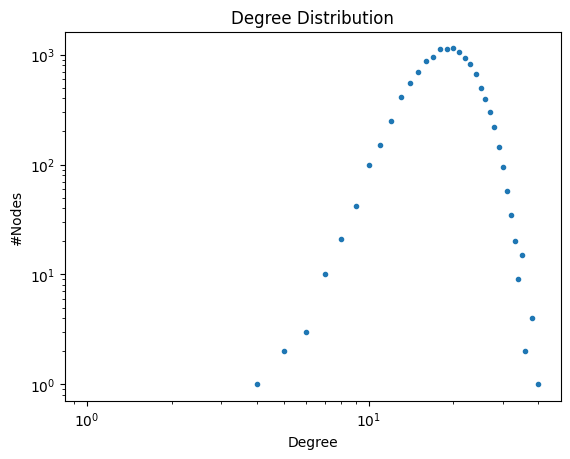

In [39]:
# Plotting Avg Degree

hist = nx.degree_histogram(er)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

In [40]:
# Nodes with the highest degree

max_k = sorted(er.degree, key=lambda x: x[1], reverse=True)
max_k

[(5279, 40),
 (1161, 38),
 (4851, 38),
 (8186, 38),
 (10045, 38),
 (3688, 36),
 (12740, 36),
 (1445, 35),
 (2518, 35),
 (2872, 35),
 (3975, 35),
 (4632, 35),
 (5689, 35),
 (6709, 35),
 (7215, 35),
 (8603, 35),
 (8712, 35),
 (9414, 35),
 (10616, 35),
 (10889, 35),
 (11985, 35),
 (12269, 35),
 (470, 34),
 (759, 34),
 (984, 34),
 (2166, 34),
 (2709, 34),
 (3881, 34),
 (7077, 34),
 (8675, 34),
 (10321, 34),
 (813, 33),
 (1182, 33),
 (2392, 33),
 (2583, 33),
 (4282, 33),
 (4460, 33),
 (4518, 33),
 (5329, 33),
 (5437, 33),
 (5958, 33),
 (6083, 33),
 (7045, 33),
 (9482, 33),
 (9947, 33),
 (10407, 33),
 (10985, 33),
 (11333, 33),
 (11539, 33),
 (12349, 33),
 (12695, 33),
 (1159, 32),
 (1629, 32),
 (1994, 32),
 (2483, 32),
 (2660, 32),
 (3486, 32),
 (3515, 32),
 (3587, 32),
 (4240, 32),
 (4286, 32),
 (4508, 32),
 (5145, 32),
 (5297, 32),
 (5300, 32),
 (5374, 32),
 (5856, 32),
 (5857, 32),
 (6951, 32),
 (7303, 32),
 (7449, 32),
 (8994, 32),
 (9221, 32),
 (9327, 32),
 (9811, 32),
 (9920, 32),
 (1

In [41]:
# Density

density = nx.density(er)
print("Network density:", density)

Network density: 0.0015431558069238175


In [42]:
# Diameter

diameter = nx.diameter(er)

print("Diameter:", diameter)

Diameter: 5


In [43]:
# Average path lenght

apl = nx.average_shortest_path_length(er)

print("Average path length:", apl)

Average path length: 3.5098572614036745


In [44]:
# Connected components analysis

cc = nx.connected_components(er) 
cc_list = [len(c) for c in sorted(cc, key=len, reverse=True)]

cc_list[:20]

[12762]

In [45]:
print(len(cc_list))

1


In [46]:
# (Avg) Clustering coefficient

clust = nx.average_clustering(er)
print(clust)

0.0014923829116235965


In [47]:
# Num of triangles

tri = nx.triangles(er)
print('The sum of all trinagles is ', sum(tri.values()))

tri = sorted(tri.items(), key=lambda x:x[1], reverse=True)
print(tri)

The sum of all trinagles is  3780
[(1743, 5), (9228, 5), (2761, 4), (3394, 4), (3890, 4), (5857, 4), (8608, 4), (9040, 4), (9066, 4), (766, 3), (932, 3), (1148, 3), (1472, 3), (1613, 3), (1759, 3), (1771, 3), (2197, 3), (2323, 3), (2361, 3), (2561, 3), (2722, 3), (3153, 3), (3241, 3), (3244, 3), (3294, 3), (3532, 3), (3688, 3), (4012, 3), (4118, 3), (4206, 3), (4625, 3), (4980, 3), (5374, 3), (5411, 3), (5635, 3), (5673, 3), (5715, 3), (6132, 3), (6240, 3), (6990, 3), (7516, 3), (7584, 3), (7599, 3), (8198, 3), (8275, 3), (8315, 3), (8444, 3), (8458, 3), (8622, 3), (8825, 3), (8901, 3), (9014, 3), (9120, 3), (9133, 3), (9221, 3), (9348, 3), (9729, 3), (9817, 3), (9882, 3), (10001, 3), (10115, 3), (10228, 3), (10394, 3), (10995, 3), (11519, 3), (11577, 3), (11730, 3), (11951, 3), (12469, 3), (12475, 3), (12591, 3), (12644, 3), (46, 2), (75, 2), (82, 2), (99, 2), (184, 2), (232, 2), (237, 2), (245, 2), (288, 2), (299, 2), (326, 2), (368, 2), (412, 2), (488, 2), (489, 2), (509, 2), (510, 

In [48]:
# Assortativity

assor = nx.degree_assortativity_coefficient(er)
print('Assortativity: ', assor)

Assortativity:  0.001189216877580048


In [49]:
# Centrality analysis

# Betweenness centrality
bc1 = nx.betweenness_centrality(er)

bc1 = sorted(bc1.items(), key=lambda x:x[1], reverse=True)

print('Betweenness centrality: ',bc1)

Betweenness centrality:  [(5279, 0.000782321628477409), (10045, 0.0007003684158362516), (1161, 0.0006799874893426951), (8186, 0.0006789952511363658), (4851, 0.0006769188613885664), (12740, 0.0006111479811575719), (3688, 0.0006070234644732125), (5689, 0.0006012379450151759), (8712, 0.000598535837658298), (10616, 0.000596889436184339), (11985, 0.0005941427742708851), (7215, 0.0005910585545390238), (1445, 0.0005863015345644439), (10889, 0.0005854670158911118), (2872, 0.0005844781951525294), (8603, 0.0005843139383204486), (4632, 0.0005814669625755749), (3975, 0.0005808177063370301), (9414, 0.0005746850030607854), (6709, 0.0005745479206741882), (3881, 0.0005733388545760777), (2518, 0.0005688152987390725), (2709, 0.0005638005705496593), (470, 0.0005634965732081829), (7077, 0.0005604387606272497), (8675, 0.0005589505489813602), (12269, 0.0005588041408176867), (984, 0.0005517294388996498), (2166, 0.0005497291689872435), (10321, 0.0005469161678014698), (759, 0.0005402530119219265), (11539, 0.00

In [50]:
# Closeness centrality

clos1 = nx.closeness_centrality(er)

clos1 = sorted(clos1.items(), key=lambda x:x[1], reverse=True)

print(clos1)

[(5279, 0.3112211301612077), (4851, 0.3093350786609459), (10045, 0.30882602066745724), (1161, 0.3084453253408102), (8186, 0.3079094681980504), (3975, 0.3067031989809407), (10616, 0.3064969376726312), (8712, 0.30607790463398254), (3881, 0.3060191846522782), (8603, 0.30572592237661717), (5689, 0.30571859802113033), (11985, 0.30565269461077843), (1445, 0.30563073312097333), (8675, 0.30563073312097333), (2872, 0.3055941376502706), (10889, 0.3054697785757032), (2709, 0.30541860131156956), (4508, 0.3051629719970347), (9414, 0.30512648845105445), (3688, 0.305097307894611), (470, 0.30497335277107285), (5928, 0.30487863149847094), (4969, 0.30475485396317437), (12740, 0.3047039159503343), (11539, 0.3045221333969693), (2483, 0.30428251228003245), (6709, 0.3042680019074869), (1182, 0.30413747080413744), (7215, 0.30413747080413744), (2166, 0.3040794929228423), (9947, 0.30400705164856107), (984, 0.30389845443071134), (10540, 0.3037682401390178), (7077, 0.3037537787722263), (12036, 0.3037393187822816

In [10]:
# Regime

# Supercritical
print('Supercritical:')
print(p > (1/G.number_of_nodes()))
print()

# Connected
print('Connected: ')
print(p > (math.log(G.number_of_nodes()))/G.number_of_nodes())
print(avgd > (math.log(G.number_of_nodes())))


Supercritical:
True

Connected: 
True
True


# BA

In [11]:
# BA model

m = int(G.number_of_edges()/G.number_of_nodes())  # number of links each node establishes once joining the network

ba = nx.barabasi_albert_graph(G.number_of_nodes(), m)

In [12]:
m

9

In [88]:
# Nodes and edges

print("Total number of nodes: ", int(ba.number_of_nodes()))
print("Total number of edges: ", int(ba.number_of_edges()))

Total number of nodes:  12762
Total number of edges:  114777


In [13]:
# Avg degree

avgd = sum(dict(ba.degree()).values())/float(len(ba))
print('Avg degree: ',avgd)

Avg degree:  17.987306064880112


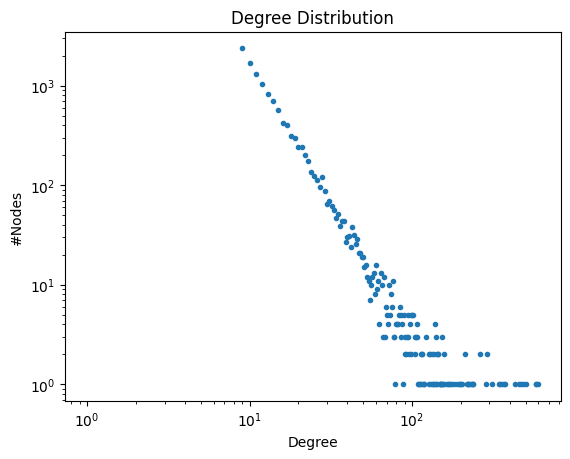

In [89]:
# Plotting Avg Degree

hist = nx.degree_histogram(ba)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

In [15]:
# Nodes with the highest degree

max_k = sorted(ba.degree, key=lambda x: x[1], reverse=True)
max_k

[(15, 589),
 (0, 565),
 (10, 419),
 (1, 413),
 (17, 398),
 (27, 394),
 (25, 390),
 (12, 377),
 (2, 355),
 (13, 346),
 (14, 344),
 (24, 333),
 (8, 319),
 (16, 300),
 (11, 298),
 (18, 291),
 (3, 282),
 (35, 267),
 (37, 259),
 (53, 258),
 (26, 255),
 (48, 248),
 (34, 247),
 (36, 229),
 (33, 227),
 (29, 226),
 (58, 224),
 (32, 219),
 (47, 219),
 (51, 213),
 (22, 212),
 (7, 205),
 (41, 205),
 (68, 202),
 (31, 198),
 (40, 198),
 (20, 195),
 (52, 195),
 (72, 195),
 (54, 193),
 (94, 190),
 (45, 180),
 (43, 178),
 (30, 171),
 (73, 167),
 (5, 165),
 (42, 165),
 (63, 164),
 (46, 159),
 (21, 158),
 (6, 157),
 (19, 156),
 (59, 155),
 (112, 154),
 (127, 152),
 (61, 151),
 (75, 151),
 (105, 151),
 (28, 148),
 (62, 147),
 (89, 146),
 (299, 143),
 (87, 140),
 (121, 140),
 (55, 139),
 (76, 138),
 (39, 136),
 (66, 135),
 (49, 132),
 (148, 131),
 (118, 130),
 (57, 129),
 (93, 128),
 (140, 127),
 (44, 125),
 (70, 125),
 (50, 124),
 (81, 124),
 (221, 124),
 (4, 122),
 (88, 122),
 (236, 122),
 (67, 121),
 (1

In [90]:
# Density

density = nx.density(ba)
print("Network density:", density)

Network density: 0.0014095530181709986


In [91]:
# Diameter

diameter = nx.diameter(ba)

print("Diameter:", diameter)

Diameter: 5


In [92]:
# Average path lenght

apl = nx.average_shortest_path_length(ba)

print("Average path length:", apl)

Average path length: 3.2008211284625263


In [93]:
# Connected components analysis

cc = nx.connected_components(ba) 
cc_list = [len(c) for c in sorted(cc, key=len, reverse=True)]

cc_list[:20]

[12762]

In [59]:
print(len(cc_list))

1


In [60]:
# (Avg) Clustering coefficient

clust = nx.average_clustering(ba)
print(clust)

0.007552126873536315


In [94]:
# Num of triangles

tri = nx.triangles(ba)
print('The sum of all trinagles is ', sum(tri.values()))

tri = sorted(tri.items(), key=lambda x:x[1], reverse=True)
print(tri)

The sum of all trinagles is  37530
[(0, 1162), (11, 1067), (14, 1007), (10, 933), (16, 778), (12, 772), (13, 657), (22, 623), (15, 505), (21, 459), (17, 410), (7, 398), (28, 387), (29, 305), (4, 300), (2, 257), (5, 254), (35, 247), (18, 244), (8, 241), (38, 235), (1, 225), (30, 198), (37, 192), (23, 180), (20, 177), (6, 175), (25, 171), (33, 161), (27, 160), (39, 148), (50, 148), (34, 146), (47, 142), (19, 140), (67, 117), (31, 113), (91, 111), (26, 109), (32, 108), (45, 107), (75, 100), (46, 99), (53, 98), (60, 98), (79, 96), (69, 93), (55, 91), (44, 86), (9, 84), (51, 84), (94, 82), (62, 75), (56, 74), (72, 73), (71, 72), (64, 71), (24, 69), (104, 69), (57, 67), (41, 66), (48, 66), (114, 65), (87, 64), (40, 63), (70, 63), (95, 63), (81, 61), (112, 61), (90, 60), (103, 60), (109, 60), (126, 60), (153, 60), (42, 59), (83, 59), (36, 58), (43, 58), (49, 58), (65, 55), (122, 55), (134, 55), (68, 53), (77, 52), (93, 52), (63, 51), (111, 51), (127, 51), (84, 50), (106, 50), (115, 50), (175,

In [62]:
# Assortativity

assor = nx.degree_assortativity_coefficient(ba)
print('Assortativity: ', assor)

Assortativity:  -0.012743489452893829


In [63]:
# Centrality analysis

# Betweenness centrality
bc2 = nx.betweenness_centrality(ba)

bc2 = sorted(bc2.items(), key=lambda x:x[1], reverse=True)

print('Betweenness centrality: ',bc2)

Betweenness centrality:  [(16, 0.03981717434767129), (0, 0.03763310717207065), (13, 0.03446147669487109), (11, 0.03321827015268602), (10, 0.03129265731631242), (19, 0.03055348392474291), (12, 0.02540866480201396), (5, 0.023913497761926014), (14, 0.022329892765213143), (15, 0.01868412123619706), (21, 0.017275792401884926), (28, 0.01647752640090815), (18, 0.01624009835291445), (17, 0.015601688885557569), (6, 0.0139968197529889), (9, 0.013408880583630527), (41, 0.012135637915050236), (61, 0.0116624046898444), (2, 0.011340619546734139), (35, 0.010823412307116179), (22, 0.010056811877646102), (29, 0.010022453902537878), (66, 0.009959363484204708), (33, 0.009792575601243053), (4, 0.0094613268786402), (40, 0.009283072335747426), (59, 0.009277115674587747), (32, 0.009093358058743896), (23, 0.008951351570492387), (26, 0.008701347585100988), (56, 0.008544602733402894), (27, 0.008385875371858453), (85, 0.00796911162973605), (69, 0.007788789532270781), (47, 0.007278867786030166), (3, 0.00697908863

In [95]:
# Closeness centrality

clos2 = nx.closeness_centrality(ba)

clos2 = sorted(clos2.items(), key=lambda x:x[1], reverse=True)

print(clos2)

[(0, 0.4628581791802684), (11, 0.45802376081260543), (14, 0.45761313920963925), (10, 0.45377284688144515), (16, 0.44620441274170425), (12, 0.44542566930782923), (13, 0.4402014557245852), (22, 0.43995862782278916), (21, 0.43130428904586476), (15, 0.43027176478521817), (17, 0.4279916823182184), (28, 0.4248426940107201), (7, 0.4240098351940457), (29, 0.4156271374132821), (4, 0.4132046757115565), (8, 0.411857733023496), (2, 0.41062522122469997), (38, 0.40975500112384805), (35, 0.4090457415777158), (18, 0.40900641025641027), (5, 0.40818219620637813), (1, 0.4072572923980341), (20, 0.4033058373629152), (37, 0.40225066195939985), (25, 0.40055872936154185), (30, 0.4002320913310751), (23, 0.39986839219127), (6, 0.39782398603360664), (33, 0.39774958700869617), (34, 0.39721720724646703), (50, 0.3956163194444444), (27, 0.39515080200656466), (47, 0.3949673465597821), (39, 0.3946375556655121), (19, 0.39353008295556174), (31, 0.3910099276872166), (75, 0.3884035915385786), (67, 0.38688455008488964), (9

In [14]:
# Regime

# Connected
print('Connected: ')
print(avgd > (math.log(G.number_of_nodes())))

Connected: 
True


# Graphs

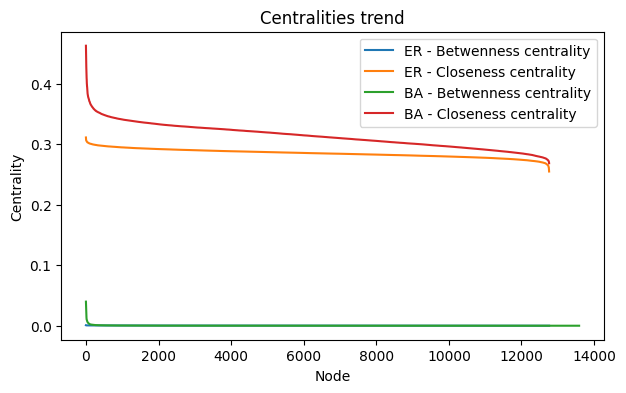

In [96]:
bc1_val = [x[1] for x in bc1]
clos1_val = [x[1] for x in clos1]
bc2_val = [x[1] for x in bc2]
clos2_val = [x[1] for x in clos2]

plt.figure(figsize=(7,4))
plt.plot(bc1_val, label='ER - Betwenness centrality')
plt.plot(clos1_val, label='ER - Closeness centrality')
plt.plot(bc2_val, label='BA - Betwenness centrality')
plt.plot(clos2_val, label='BA - Closeness centrality')
plt.title('Centralities trend')
plt.xlabel("Node")
plt.ylabel("Centrality")
plt.legend()
plt.show()

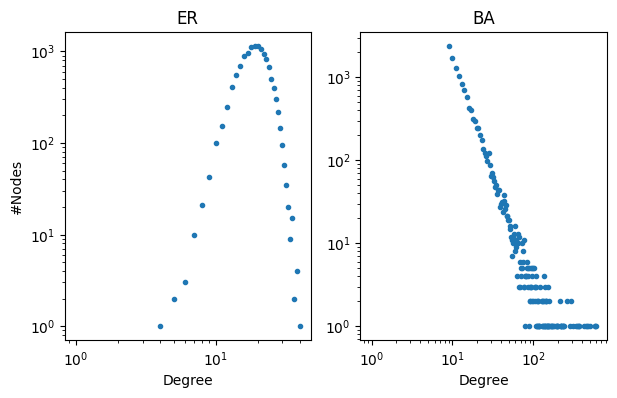

In [97]:
# Plotting Avg Degree

hist1 = nx.degree_histogram(er)
hist2 = nx.degree_histogram(ba)

plt.figure(figsize=(7,4))

plt.subplot(1,2,1)    
plt.plot(range(0, len(hist1)), hist1, ".")
plt.ylabel("#Nodes")
plt.xlabel('Degree')
plt.title('ER')
plt.loglog()

plt.subplot(1,2,2)    
plt.plot(range(0, len(hist2)), hist2, ".")
plt.xlabel('Degree')
plt.title('BA')
plt.loglog()


plt.show()